In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import seaborn as sns
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset?resource=download&SSORegistrationToken=CfDJ8OV3w-Vr_2dIpZxXY9wVZZlj3PAUDwbxK80dJ_BYmhQn5gZz5Rse73dyWE9CtzbuG8ingEqe4Nh5kANr1ISEh4Cm0KAdS8cbSiBpKwbvkyU62rECjdq3VGD4_jJh1QapU9H9coaBM_xq-6MRCyLAUUFg2mfYXl6bpE2GLeq7OrImkY4Va_8xc4bSjS9T_R07u7TbPtRCEwLjpG3k7bDeLDSMJz4YUQj6sR0AKoEYhxCih2WdHpUSh5cQ2fCPS1RjM8RWTycrG6dGoqEtLMkm9iD4-eKAYvgV-ALWjUwteQ3hr897z289QS3sWs17I0DVdV423f0R6pQT7zIngvIAQD1fradxFPA&DisplayName=ronald+more+%28Splintx14%29&select=House_Rent_Dataset.csv



El dataset fue extraido del enlace compartido

In [2]:
datos = pd.read_csv('House_Rent_Dataset.csv')

In [3]:
datos.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


Leemos los datos y vemos los datos si estan correctamente y no presentar valores nulos y faltantes

In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [5]:
datos.isna().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [6]:
datos = datos.drop_duplicates()

In [7]:
datos

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


# ***Eda***

1- vemos por ciudad el total de rentas posteadas y visualizaciones

Empezamosseparando todas las ciudades

In [8]:
datos_c=datos[['City']]

In [9]:
datos_c

,City
0,Kolkata
1,Kolkata
2,Kolkata
3,Kolkata
4,Kolkata
...,...
4741,Hyderabad
4742,Hyderabad
4743,Hyderabad
4744,Hyderabad


Agrupamos y contamos las rentas totales en  cada ciudad

In [10]:
datosg=datos_c.groupby('City')

In [11]:
datos_c['count1']=(datosg['City'].transform('count'))

<ipython-input-11-ab99505bb0e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_c['count1']=(datosg['City'].transform('count'))


In [12]:
datos_c=datos_c.drop_duplicates()
datos_c

,City,count1
0,Kolkata,524
524,Mumbai,972
1496,Bangalore,886
2382,Delhi,605
2987,Chennai,891
3878,Hyderabad,868


La ciudad de Mumbai tiene la mayor cantidad de rentas, visualizamos los resultados en una grafica

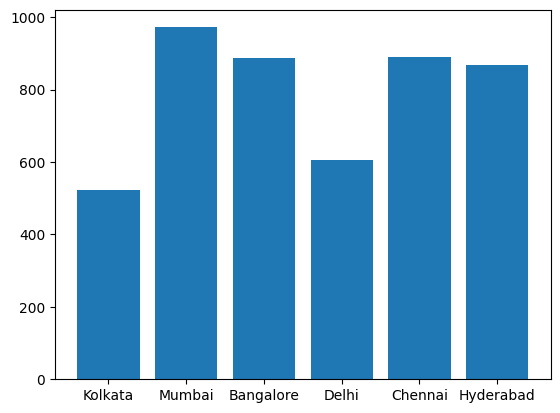

In [13]:
tipo=datos_c['City']
total=datos_c['count1']
plt.bar(tipo,total)
plt.show()


La ciudad de kolkata posee menor cantidad de rentas, una interpretacion de esto seria que esta en zonas alejada de la gran ciudad, o un lugar muy reservado con nuevos inquilinos.

In [14]:
datop=datos[datos['City']=='Mumbai']

Buscamos la ciudad con mayor cantidad de rentas y vemos por los tipos de inquilinos

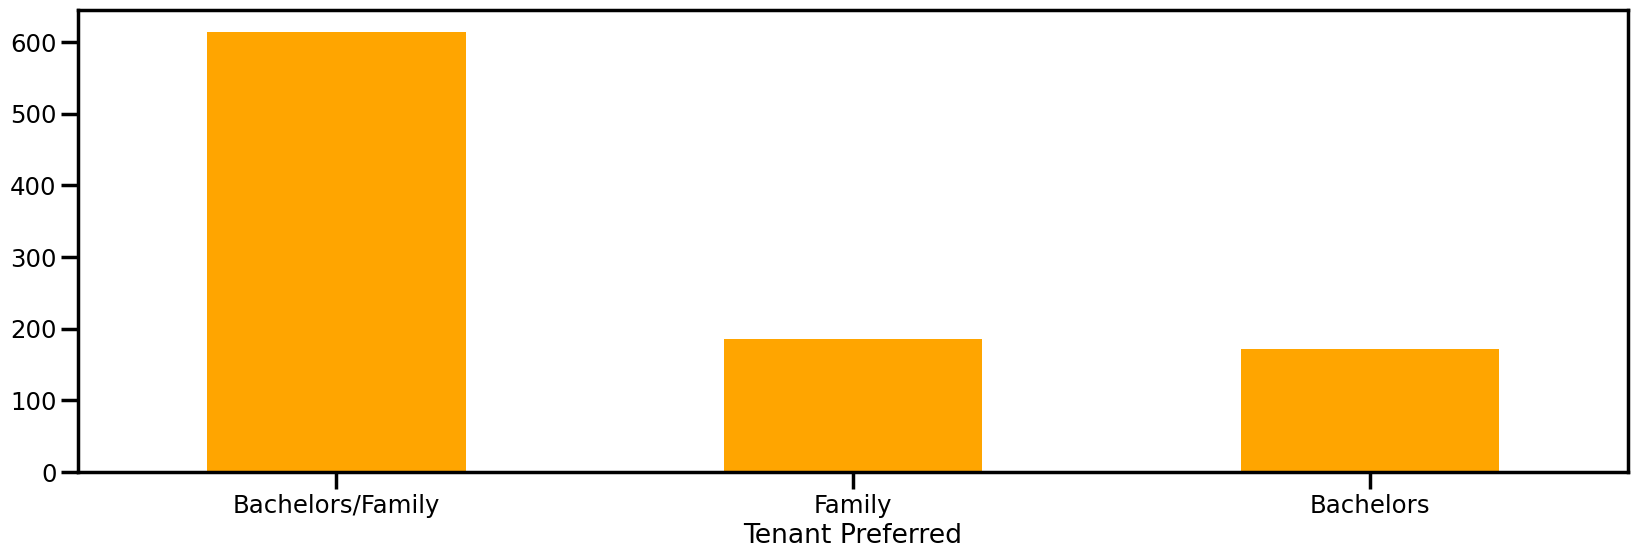

In [15]:
sns.set_context("poster", font_scale = .8)
plt.figure(figsize = (20, 6))
ax = datop["Tenant Preferred"].value_counts().plot(kind = 'bar', color = "Orange", rot = 0)


Podemos decir que los agentes o propetarios de las viviendas para solo una persona es menor mientras que las que pueden ser solteros o familiares es decir un paso auto suficiente son en su mayoria las predominantes.

In [16]:
datop["Tenant Preferred"].value_counts()

Tenant Preferred
Bachelors/Family    614
Family              186
Bachelors           172
Name: count, dtype: int64

contamos los tipo de inquilino preferido por el propietario o agente.

# **2- Buscamos las rentas mas economicas, las cuales son las que esten por debajo del promedio y visualizar los  precios de renta atraves de los meses**

In [17]:
promedio = datos['Rent'].mean()
round(promedio)

34993

Obtenemos el promedio de todas las rentas del dataset

In [18]:
datos1=datos[datos['Rent']<= 34993]

Filtramos con el promedio y asi tenemos todos los datos de lo que deamos saber que son las rentas con un precio menor al promedio

In [19]:
datos1

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4739,2022-07-06,2,25000,1040,2 out of 4,Carpet Area,Gachibowli,Hyderabad,Unfurnished,Bachelors,2,Contact Owner
4740,2022-06-02,2,12000,1350,2 out of 2,Super Area,Old Alwal,Hyderabad,Unfurnished,Bachelors/Family,2,Contact Owner
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner


In [20]:
datos2=datos1[['Posted On','Rent' ]]

Separamos los datos de las publicaciones y las sus respectivas rentas

In [21]:
datos2['times']= pd.to_datetime(datos2['Posted On']).dt.month

<ipython-input-21-5ccdc491cc12>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos2['times']= pd.to_datetime(datos2['Posted On']).dt.month


Creamos una nueva columna dodne sera el mes del año de la publicacion asi podemos hacer un visualizacion de de los datos con respecto al tiempo basado en los meses

In [22]:
datos2

,Posted On,Rent,times
0,2022-05-18,10000,5
1,2022-05-13,20000,5
2,2022-05-16,17000,5
3,2022-07-04,10000,7
4,2022-05-09,7500,5
...,...,...,...
4739,2022-07-06,25000,7
4740,2022-06-02,12000,6
4741,2022-05-18,15000,5
4742,2022-05-15,29000,5


<Axes: xlabel='times', ylabel='Rent'>

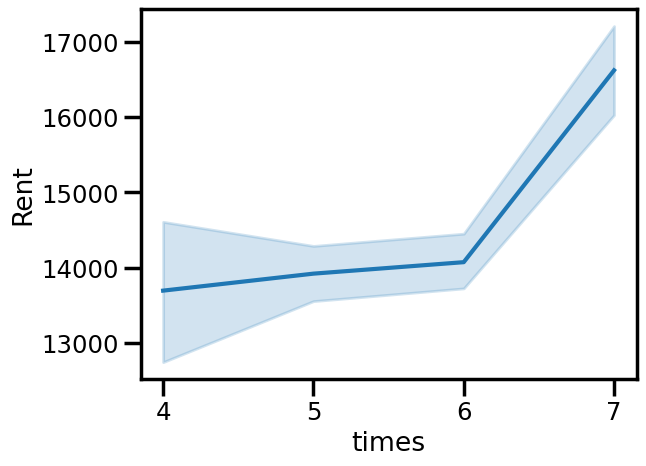

In [23]:
sns.lineplot(data=datos2, x='times', y='Rent')

Y como podemos observar desde abril hasta junio teniamos una constancia en los precios pero de junio en adelante tuvimos una alza en los precios, eso no da a entender que entre mas alto el mes siendo diciembre el maximo mes el precio sera mucho mayor a los del inicio del año


Esto tambien ayuda a planificar mejor un estmidado de los precio a ciertos meses del año y para asi estar preparado como una persona o cliente ordinario, para el analis podemos ver un crecimiento esto no solo interesa a los que quieren rentar sino a las personas que rentan porque puede ver que momentos se pueden subir los precios.

# ***Predicciones***

Ahora Vemos que correlacion tiene las columnas entre ellas eso nos ayudaraa selecionar las columnas para elaborar predicciones

In [24]:
datos3=pd.read_csv('House_Rent_Dataset.csv')
datos3['times']= pd.to_datetime(datos3['Posted On']).dt.month

In [25]:
categorical_cols = datos3.select_dtypes(include="object").columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    datos3[col] = label_encoder.fit_transform(datos3[col])

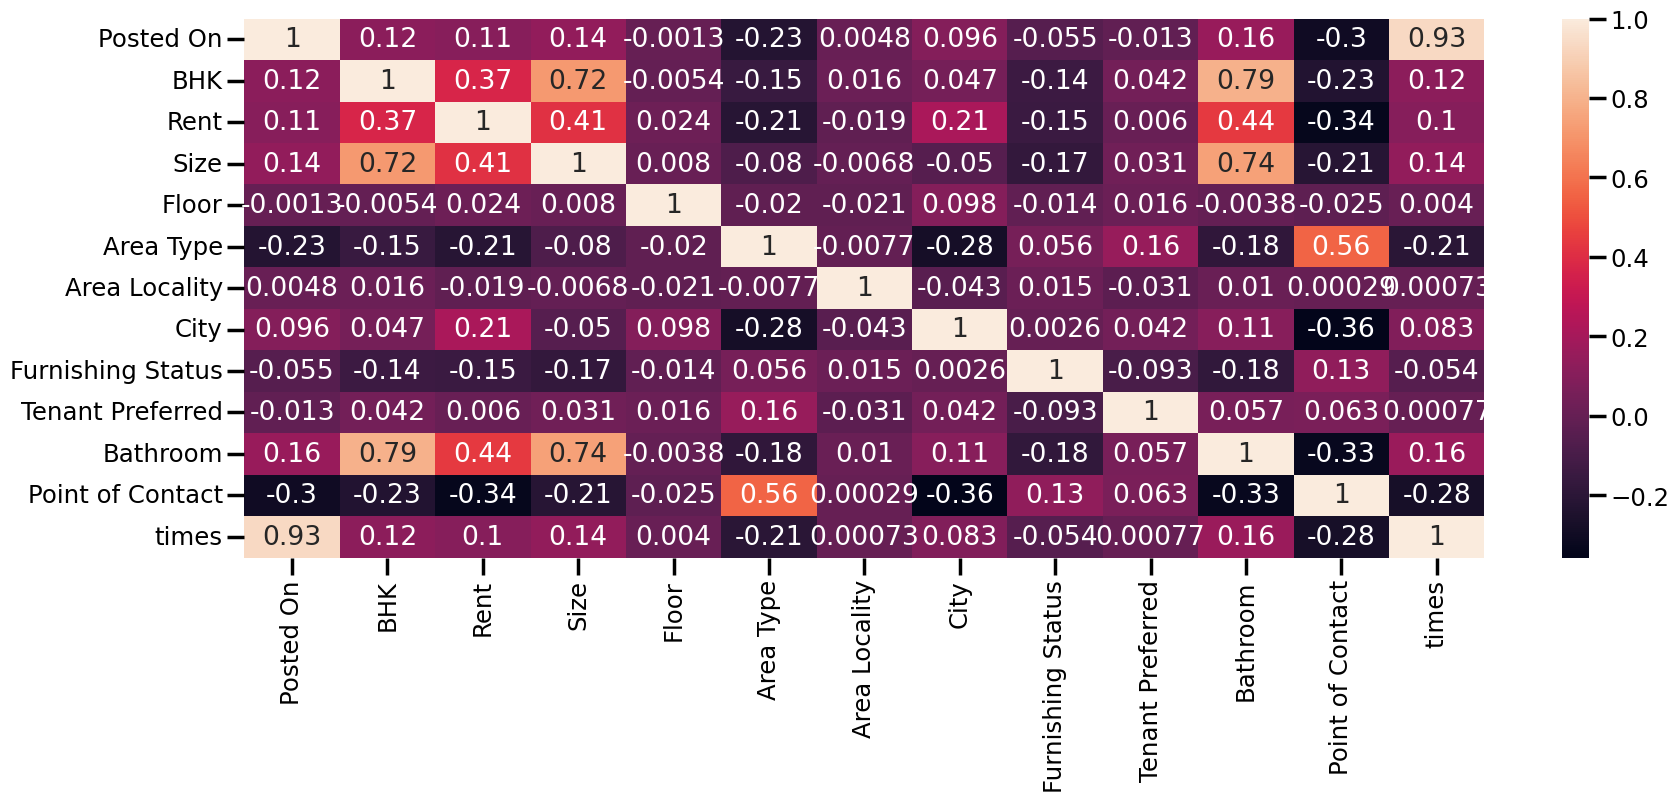

In [26]:
corr = datos3.corr()
plt.subplots(figsize=(20,7))
sns.heatmap(corr, vmax = 1,square = False,annot=True)
plt.show()

Como podemos observar algunas correlaciones tiene valor negativo pero eso no quieren decir que no tengan relacion lo mas importante es que el valor sea lo mas cercano a 1 o -1 y podemos identificar 3 columnas que practicamente no poseen correlacion

In [27]:
b1, b0= np.polyfit(datos3['Bathroom'], datos3['Size'],1)
print(b0,b1)

-76.5380864620467 531.0783235100615


Usando las librerias ya existentes y los metodos calculamos b1 y b0
B1 obtenemos la pendiente de la recta y el b0 el punto de origen donde la recta va a cortar en el eje de las y , con estos valores podemos trazar la recta para visualizar en la grafica

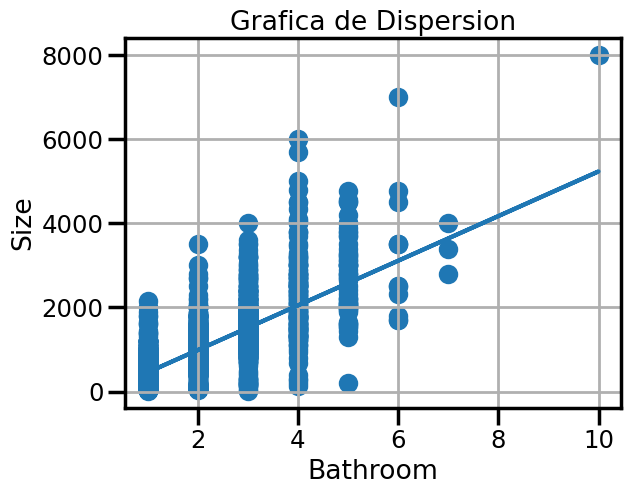

In [28]:
plt.scatter(datos3['Bathroom'], datos3['Size'])
plt.plot(datos3['Bathroom'],b0+b1*datos3['Bathroom'])
plt.title('Grafica de Dispersion')
plt.xlabel('Bathroom')
plt.ylabel('Size')
plt.grid()
plt.show()

In [29]:
print('Este dataset contiene {} filas y {} columnas'.format(datos3.shape[0], datos3.shape[1]))
print('Columnas: {}'.format(datos3.columns.values.tolist()))
datos3

Este dataset contiene 4746 filas y 13 columnas
Columnas: ['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type', 'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred', 'Bathroom', 'Point of Contact', 'times']


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,times
0,26,2,10000,1100,455,2,221,4,2,1,2,2,5
1,21,2,20000,800,14,2,1527,4,1,1,1,2,5
2,24,2,17000,1000,14,2,1760,4,1,1,1,2,5
3,73,2,10000,800,10,2,526,4,2,1,1,2,7
4,17,2,7500,850,10,1,1890,4,2,0,1,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,26,2,15000,1000,271,1,219,3,1,1,2,2,5
4742,23,3,29000,2000,16,2,1214,3,1,1,3,2,5
4743,79,3,35000,1750,271,1,724,3,1,1,3,0,7
4744,75,3,45000,1500,226,1,590,3,1,2,2,0,7


In [30]:
datos4=datos3.copy()

Hacemos una copia de los datos para trabajar con la copia

In [31]:
datos4 = datos4.drop('Area Locality', axis=1)
datos4['BHK'].unique()
datos4['Size'].unique()
datos4['Rent'].unique()
datos4['City'].unique()
datos4['Tenant Preferred'].unique()
datos4['Bathroom'].unique()
datos4['times'].unique()

array([5, 7, 4, 6], dtype=int32)

Eliminamos la columna que no es de nuestro interes y nos puede ocasioanr problemas

In [32]:
y = datos4['Rent']
x = datos4.drop('Rent', axis=1)

one_hot_X = pd.get_dummies(x)
x_train, x_test, y_train, y_test = train_test_split(one_hot_X, y, test_size=0.3, random_state=42)

Selecionamos la variable a predecir , tambien 2/3 de el conjunto de datos se usara para el entrenammiento y un 1/3 del conjunto de los datos para la validacion

In [33]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

Iniciamos la Regresion Lineal Y compramos el puntaje que tiene esta prediccion

In [34]:
model.score(x_train,y_train)

0.23408023714313908

Se usan los datos de entranamiento para medir la confianza.
Para esta variable el porcentaje de prediccion es muy bajo lo que no nos proporciona una confianza en las estimaciones que se dean calcular

In [35]:
model.score(x_test,y_test)

0.4778170417568638

Vemos la confianza que nos da usando los datos de prueba

In [36]:
y_predict=model.predict(x_test)
y_predict

array([  8940.53398503,  19854.29850989,  35349.75506758, ...,
        25781.04809984, 165553.6105644 ,  51130.81315202])

Predecimos los datos usando el modelo de prediccion.
Vemos los datos de predicion y ahora veremos el valor de error de los datos

In [37]:
knn_rmse = mean_squared_error(y_predict, y_test, squared=False)
print('KNN RMSE:', knn_rmse)

KNN RMSE: 42868.914711098885


Podemos observar que tiene un error muy grande lo que no proporciona confianza Repetimos el mismo proceso pero esta vez con la variable Size

In [38]:
datos4=datos3.copy()

In [39]:
datos4 = datos4.drop('Area Locality', axis=1)
datos4['BHK'].unique()
datos4['Size'].unique()
datos4['Rent'].unique()
datos4['City'].unique()
datos4['Tenant Preferred'].unique()
datos4['Bathroom'].unique()
datos4['times'].unique()

array([5, 7, 4, 6], dtype=int32)

In [40]:
y1 = datos4['Size']
x1 = datos4.drop('Size', axis=1)

one_hot_X1 = pd.get_dummies(x1)
x_train1, x_test1, y_train1, y_test1 = train_test_split(one_hot_X1, y1, test_size=0.3, random_state=42)

Colocamos en la variable y los datos que deseamos predecir, y preparamos las variables para los algoritmos

In [41]:
model1 = LinearRegression()
model1.fit(x_train1,y_train1)

LinearRegression()

In [42]:
model1.score(x_train1,y_train1)

0.6215116888647195

Vemos que tenemos un 62% de confianza en este predicion si bien es un valor mediano se suele trabajar con valores ams alto cercanos al 90%.

In [43]:
model1.score(x_test1,y_test1)

0.6250241949738924

Podemos obserbar que los datos de prueba tienen una muy pequeña mejora con los datos de entrenamiento pero sigue siendo un valor de confianza medio.

In [44]:
y_predict1=model1.predict(x_test1)
y_predict1

array([1061.23543061, 1050.32862553,  769.5451414 , ...,  982.51999729,
       2341.49049059,  960.57227553])

Predecimos los datos de prueba

In [45]:
knn_rmse = mean_squared_error(y_predict1, y_test1, squared=False)
print('KNN RMSE:', knn_rmse)

KNN RMSE: 387.2760548899459


Muestra un error medianos lo que puede considerarse en algunos caso algo malo y en otros no.

Como podemos observar tiene un margen de error no tan grande pero si considerable para ser estudiado  y un 63% de confianza en la prediccion si bien no es muy alta se podria usar para dar un entendimiento de los datos y de las predicciones. Aunque Siempre se prefieren predicciones con un valor de 90+% de confianza.

Probemos con otro metodo de prediciones

**Bosque aleatoreos**

Para este modelo usaremos los miamo valores que se usaron en las dos predicciones de Regresion lineal

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

Caso 1 el de Predecimos Rentas con Bosques aleatoreos

In [47]:
model_f = RandomForestRegressor(n_estimators=10)

Para este metodo tenemos que definir una variable nuevo que seria el numero de arboles que usaremos

In [48]:
model_f.fit(x_train,y_train)

RandomForestRegressor(n_estimators=10)

In [49]:
model_f.score(x_train,y_train)

0.832656381048704

Podemos que ver que tenemos un grado de confianza de 83% algo muy bueno que nos da una mejor confianza al predecir los datos.

In [50]:
model_f.score(x_test,y_test)

-0.4478111962318385

Con los datos de prueba tenemos algo inspereado tenemos un valor de confianza 44% pero es sentido contrario es decir negativo y  mas bajo de los datos en entrenamiento, algo inesperado del otro algoritmo regresion lineal que los datos pruebas dieron mayor % que los datos de entrenamiento.

In [51]:
y_predict=model_f.predict(x_test)
y_predict

array([ 24150.,  19500.,  32500., ...,  20450., 226000.,  22400.])

Predecimos las valores de prueba

In [52]:
knn_rmse = mean_squared_error(y_predict, y_test, squared=False)
print('KNN RMSE:', knn_rmse)

KNN RMSE: 71381.73622320019


Y como podemos obervar tenemos un margen de error muy grande
Para los valores de prediccion algo significativo, y como vimos la confianza para los valores de prueba fue muy bajo nos dejo este margen de error muy grande, en caso contrario a los datos de entrenamiento que era un porcentaje muy alto de confianza

Ahora precedemos a realizar el algoritmo para el caso 2

In [53]:
model_f2 = RandomForestRegressor(n_estimators=10)

In [54]:
model_f2.fit(x_train1,y_train1)

RandomForestRegressor(n_estimators=10)

In [55]:
model_f2.score(x_train1,y_train1)

0.9367899472999084

Podemos Ver que el porcentaje de confianza es muy alto un 94% lo que no da una alta confianza a la hora de predeccion los datos. Pero esto es para los datos de entrenamiento

In [56]:
model_f2.score(x_test1,y_test1)

0.694019503169047

Al igual que el caso 1 los datos de prueba mostraron que el porcentaje de confianza bajo significativamente de 94 a 70% de si bien no un porcentaje bajo no es un porcentaje muy alto para concluir que la confianza sea buena pero podemos probar las predicciones y ver que tanto error posee.

In [57]:
y_predict1=model_f2.predict(x_test1)
y_predict1

array([ 916.6,  946. ,  711. , ...,  641.5, 2689.7, 1035. ])

Predecimos los datos de prueba

In [58]:
knn_rmse = mean_squared_error(y_predict1, y_test1, squared=False)
print('KNN RMSE:', knn_rmse)

KNN RMSE: 349.83712496383833


Y vemos que nos da un margen de error de 350 en el tamaño no es valor pequeño pero tampoco un valor tan grande, ya que es un valor un poco por debajo de la mitad pero sigue diendo un valor significativo que puede alejarnos de los valores extactos que queremos predecir o lo mas cercano.
Recordemos que nunca podemos predecir el futuro lo mas que podemos hacer es estimarlo usando los datos para acercanos lo mas posible a estos.

# ***Conclusion***

Como podemos visualizar podemos realizar diferentes operaciones para ver comportamientos de los datos como en el caso 1 de la exploracion como los precios fueron aumentado en un cierto tiempo. Y con los algoritmos pudimos ver que tanta confianza tenemos a la hora de predecir los datos y cuanto seria los errores asi como usando los mismo datos ver la diferencia entre estos tantos en los valores de confianza como los errores y las predicciones.
Cada algoritmo tiene su fuerte y baja ya es cuestion de cada pj que algoritmo usar y el mas indicado para el problema que deseamos resolver.
gracias por su tiempo.